### Heart Disease Analysis using the RandomForestClassifier from scikit-learn

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
heart_disease = pd.read_csv('https://raw.githubusercontent.com/Vikas-KM/machine-learning/master/Practice/datasets/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
heart_disease.shape

(303, 14)

In [6]:
#create X (Feature Matrix)
X = heart_disease.drop('target', axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [7]:
y= heart_disease['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### Another way to discard the target column

In [8]:
heart_disease.iloc[:,0:-1]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


### only selecting the target column

In [9]:
heart_disease.iloc[:,-1]

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

### chossing the right model or estimator

### using the random forest

In [10]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

#keep the default paramters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [0]:
#Fit the Model to Training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [13]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
#make a prediction
y_preds = clf.predict(X_test)

In [20]:
y_preds

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1])

In [21]:
y_test

54     1
166    0
227    0
276    0
40     1
      ..
148    1
87     1
176    0
78     1
82     1
Name: target, Length: 61, dtype: int64

In [22]:
#Evaluate the model
clf.score(X_train, y_train)

1.0

In [23]:
clf.score(X_test, y_test)

0.8688524590163934

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        28
           1       0.84      0.94      0.89        33

    accuracy                           0.87        61
   macro avg       0.88      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61



In [26]:
confusion_matrix(y_test, y_preds)

array([[22,  6],
       [ 2, 31]])

In [27]:
accuracy_score(y_test, y_preds)

0.8688524590163934

In [28]:
# improve the model
# 1: try different n_estimators
np.random.seed(1)
for i in range(10, 100, 10):
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print('the score is ', score)

the score is  0.8688524590163934
the score is  0.8688524590163934
the score is  0.8852459016393442
the score is  0.8688524590163934
the score is  0.9016393442622951
the score is  0.8852459016393442
the score is  0.8688524590163934
the score is  0.8688524590163934
the score is  0.8688524590163934


In [0]:
#save a model
import pickle
pickle.dump(clf, open('random_forest_model_1.pkl', 'wb'))

In [30]:
loaded_model = pickle.load(open('random_forest_model_1.pkl', 'rb'))
loaded_model.score(X_test, y_test)

0.8688524590163934

In [31]:
heart_disease.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

### getting data ready

#### split data into features (X) and labels (y)
#### filling and disregarding missing values
#### Converting non-numerical values to numerical values ( feature encoding)

### making data columns numerical

In [33]:
car_sales = pd.read_csv('https://raw.githubusercontent.com/Vikas-KM/machine-learning/master/Practice/datasets/car-sales-extended.csv')
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [34]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [35]:
car_sales.shape

(1000, 5)

### for machine learning we need call columns tobe numerical

In [0]:
X = car_sales.drop('Price', axis=1)
y = car_sales['Price']

In [37]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [38]:
y.head()

0    15323
1    19943
2    28343
3    13434
4    14043
Name: Price, dtype: int64

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [40]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 4), (200, 4), (800,), (200,))

### building Machine learning Model

In [41]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: ignored

### due to non-numerical columns , there is error above

In [42]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                 one_hot,
                                 categorical_features)],
                               remainder='passthrough')
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [43]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [44]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [45]:
dummies = pd.get_dummies(car_sales[['Make','Colour','Doors']])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [46]:
## refit the model
np.random.seed(1)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                   y,
                                                   test_size=0.2)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [47]:
model.score(X_test, y_test)

0.31207113535105824

### Handling missing data 

#### Fill with missing values with some data
#### Remove them altogether

In [48]:
car_sales_missing = pd.read_csv('https://raw.githubusercontent.com/Vikas-KM/machine-learning/master/Practice/datasets/car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [49]:
car_sales_missing.isna()

,Make,Colour,Odometer (KM),Doors,Price
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
995,False,False,False,False,False
996,True,False,False,False,False
997,False,False,False,False,False
998,False,False,False,False,False


### show total number of missing values

In [50]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [0]:
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

In [52]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0


In [53]:
y.head()

0    15323.0
1    19943.0
2    28343.0
3    13434.0
4    14043.0
Name: Price, dtype: float64

In [54]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                 one_hot,
                                 categorical_features)],
                               remainder='passthrough')
transformed_X = transformer.fit_transform(X)
transformed_X

ValueError: ignored

### Above dataframe conatins NaN - lets get that out

### Fill missing data 

In [55]:
car_sales_missing['Doors'].value_counts()

4.0    811
5.0     75
3.0     64
Name: Doors, dtype: int64

In [0]:
car_sales_missing['Make'].fillna('missing', inplace=True)
car_sales_missing['Colour'].fillna('missing', inplace=True)
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(), inplace=True)
car_sales_missing['Doors'].fillna(4, inplace=True)

In [57]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

### remove rows with missing price

In [0]:
car_sales_missing.dropna(inplace=True)

In [59]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [60]:
len(car_sales_missing)

950

In [0]:
X = car_sales_missing.drop('Price', axis=1)
y= car_sales_missing['Price']

In [62]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                 one_hot,
                                 categorical_features)],
                               remainder='passthrough')
transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Feature scaling
### links
#### https://medium.com/@rahul77349/feature-scaling-why-it-is-required-8a93df1af310
#### https://benalexkeen.com/feature-scaling-with-scikit-learn/
#### https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

In [64]:
car_sales_missing = pd.read_csv('https://raw.githubusercontent.com/Vikas-KM/machine-learning/master/Practice/datasets/car-sales-extended-missing-data.csv')
car_sales_missing.head()


,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [65]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [66]:
car_sales_missing.dropna(subset=['Price'], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [0]:
X=car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']


In [68]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0


In [69]:
y.head()


0    15323.0
1    19943.0
2    28343.0
3    13434.0
4    14043.0
Name: Price, dtype: float64

### Filling missing value with scikit-learn

In [0]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

### Fill categorical values with 'missing' and mean

In [0]:
categorical_imputer  = SimpleImputer(strategy='constant', fill_value='missing')
door_imputer = SimpleImputer(strategy='constant', fill_value=4)
numerical_imputer = SimpleImputer(strategy='mean')

### Define columns

In [0]:
categorical_features = ['Make', 'Colour']
door_features = ['Doors']
numerical_features = ['Odometer (KM)']

### create Imputer

In [73]:
imputer = ColumnTransformer([
    ('cat_imputer', categorical_imputer, categorical_features),
    ('door_imputer', door_imputer, door_features),
    ('num_imputer', numerical_imputer, numerical_features)
])

filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [74]:
X.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [75]:
car_sales_filled = pd.DataFrame(filled_X,
                               columns=['Make', 'Colour', 'Doors', 'Odometer (KM)'])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4,35431
1,BMW,Blue,5,192714
2,Honda,White,4,84714
3,Toyota,White,4,154365
4,Nissan,Blue,3,181577


In [76]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [77]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                 one_hot,
                                 categorical_features)],
                               remainder='passthrough')
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

### Building the model

In [0]:
np.random.seed(1)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y,test_size=0.2)


In [79]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.25158720734485374

## choosing the right estimator/algorithm/model

### Picking ML Algo/Model for regression model

In [80]:
from sklearn.datasets import load_boston
boston = load_boston()
boston

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [81]:
boston_df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
boston_df['target'] = pd.Series(boston['target'])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [82]:
len(boston_df)

506

### lets try ridge regression, following the sklern map

In [0]:
from sklearn.linear_model import Ridge

np.random.seed(1)

X = boston_df.drop('target', axis=1)
y = boston_df['target']

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [85]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [86]:
y.head(), len(y)

(0    24.0
 1    21.6
 2    34.7
 3    33.4
 4    36.2
 Name: target, dtype: float64, 506)

In [87]:
model = Ridge()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7655800611077147

### how to improve the score

#### lets use different model

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
np.random.seed(1)
X = boston_df.drop('target', axis=1)
y=boston_df['target']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)


In [89]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9103126580548283

### Choosing estimator for classification problem

In [91]:
heart_disease = pd.read_csv('https://raw.githubusercontent.com/Vikas-KM/machine-learning/master/Practice/datasets/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [92]:
len(heart_disease)

303

In [0]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

np.random.seed(1)
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [95]:
model = LinearSVC()
model.fit(X_train, y_train)
model.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.7704918032786885

In [96]:
heart_disease['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

### Another model selection

### ensemble classifiers

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(1)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [99]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7868852459016393

### Fitting model to data

In [100]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### make predictions using ML Model
##### two methods 1: predict and predict_proba()

In [101]:
model.predict([1,2,3,4])

ValueError: ignored

In [102]:
model.predict(X_test)

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0])

In [103]:
# comparing predictions to true value
y_preds = model.predict(X_test)
np.mean(y_preds == y_test)

0.7868852459016393

In [104]:
model.score(X_test, y_test)

0.7868852459016393

In [105]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.7868852459016393

### predict_proba()

In [106]:
model.predict_proba(X_test)[:5]

array([[0.84, 0.16],
       [0.21, 0.79],
       [0.81, 0.19],
       [0.98, 0.02],
       [0.85, 0.15]])

In [107]:
model.predict(X_test)[:5]

array([0, 1, 0, 0, 0])

In [108]:
heart_disease['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

### Making predictions using regression model

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(1)

X = boston_df.drop('target',axis=1)
y = boston_df['target']


In [110]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [111]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: target, dtype: float64

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2)

In [113]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9103126580548283

In [0]:
y_preds = model.predict(X_test)

In [115]:
y_preds[:5]

array([29.928, 26.982, 20.298, 20.61 , 19.804])

In [116]:
np.array(y_test[:10])

array([28.2, 23.9, 16.6, 22. , 20.8, 23. , 27.9, 14.5, 21.5, 22.6])

In [117]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

2.3109117647058848

### evaluating a model
Three methods
1: Estimator score method
2: The scoring parameter
3: Problem-Specific metric functions

In [0]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(1)
X = heart_disease.drop('target', axis=1)
y=heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [119]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7868852459016393

### Scoring paramter method

In [120]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(1)

X= heart_disease.drop('target', axis=1)
y=heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7868852459016393

In [121]:
cross_val_score(model, X, y, cv=5)

array([0.81967213, 0.86885246, 0.73770492, 0.81666667, 0.75      ])

In [122]:
cross_val_score(model, X, y, cv=10)

array([0.90322581, 0.80645161, 0.83870968, 0.9       , 0.83333333,
       0.8       , 0.73333333, 0.83333333, 0.73333333, 0.73333333])

In [123]:
np.random.seed(1)
model_single_score = model.score(X_test, y_test)
model_cross_val_score = np.mean(cross_val_score(model, X, y, cv=5))

model_single_score, model_cross_val_score

(0.7868852459016393, 0.8183060109289617)

### evaluation metrics
1. Accuracy
2. ROC
3. Confusion Matrix
4. Classification report

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(1)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

model = RandomForestClassifier(n_estimators=100)
cross_val_score = cross_val_score(model, X,y,cv=5)

In [125]:
np.mean(cross_val_score)

0.8183060109289617

### ROC

In [126]:
from sklearn.metrics import roc_curve
model.fit(X_train, y_train)
y_probs = model.predict_proba(X_test)
y_probs[:10]

array([[0.87, 0.13],
       [0.24, 0.76],
       [0.77, 0.23],
       [0.98, 0.02],
       [0.79, 0.21],
       [0.96, 0.04],
       [0.96, 0.04],
       [0.35, 0.65],
       [0.99, 0.01],
       [0.11, 0.89]])

In [127]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.13, 0.76, 0.23, 0.02, 0.21, 0.04, 0.04, 0.65, 0.01, 0.89])

### FRP, TRP, Threshold


In [128]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03333333, 0.03333333, 0.06666667, 0.06666667, 0.1       ,
       0.1       , 0.13333333, 0.13333333, 0.16666667, 0.23333333,
       0.23333333, 0.26666667, 0.26666667, 0.3       , 0.33333333,
       0.33333333, 0.36666667, 0.4       , 0.46666667, 0.46666667,
       0.53333333, 0.6       , 0.73333333, 0.83333333, 0.86666667,
       0.96666667, 1.        ])

In [129]:
tpr

array([0.        , 0.06451613, 0.09677419, 0.19354839, 0.35483871,
       0.35483871, 0.38709677, 0.41935484, 0.48387097, 0.48387097,
       0.51612903, 0.5483871 , 0.58064516, 0.61290323, 0.61290323,
       0.70967742, 0.70967742, 0.83870968, 0.87096774, 0.87096774,
       0.90322581, 0.90322581, 0.93548387, 0.93548387, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [0]:
#function to plot the ROC curve

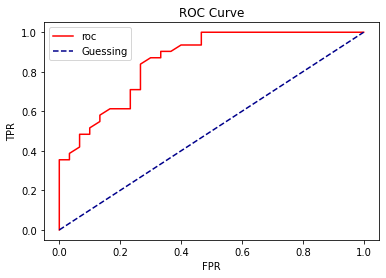

In [135]:
def plot_roc_curve(fpr, tpr):
  plt.plot(fpr, tpr, color='red', label='roc')
  plt.plot([0,1],[0,1], color='darkblue', linestyle='--', label='Guessing')
  plt.xlabel('FPR')
  plt.ylabel('TPR')
  plt.title('ROC Curve')
  plt.legend()
  plt.show()

plot_roc_curve(fpr, tpr)

In [137]:
#auc = area under curve
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8575268817204301

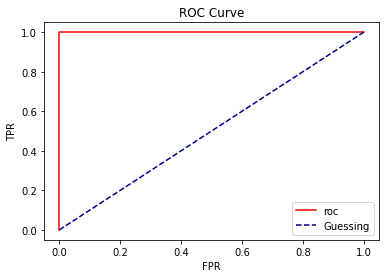

In [138]:
#plot perfect roc cureve
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [139]:
# perfect auc score
roc_auc_score(y_test, y_test)

1.0

In [0]:
## confusion matrix

In [142]:
from sklearn.metrics import confusion_matrix
y_preds = model.predict(X_test)
y_preds

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0])

In [143]:
confusion_matrix(y_test, y_preds)

array([[21,  9],
       [ 4, 27]])

In [144]:
# visualize the confusion matrix
pd.crosstab(y_test, y_preds, rownames=['Actual Lables'], colnames=['Predicted Labels'])

Predicted Labels,0,1
Actual Lables,,
0,21,9
1,4,27


In [145]:
len(y_preds)

61

In [146]:
21+9+4+27

61

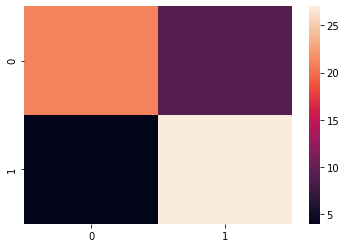

In [154]:
# confusion matrix using seaborn heatmap
conf_mat = confusion_matrix(y_test, y_preds)
sns.heatmap(conf_mat)

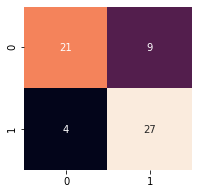

In [160]:
def conf_mat_plot(conf_mat):
  fig,ax = plt.subplots(figsize=(3,3))
  ax = sns.heatmap(conf_mat, annot=True, cbar=False)

conf_mat_plot(conf_mat)

[[21  9]
 [ 4 27]]


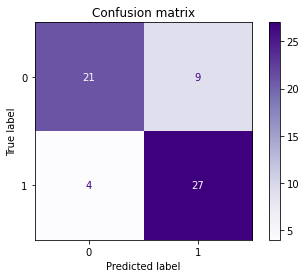

In [166]:
from sklearn.metrics  import plot_confusion_matrix


disp = plot_confusion_matrix(model, X_test, y_test,
                                 cmap=plt.cm.Purples)
disp.ax_.set_title('Confusion matrix')

print(disp.confusion_matrix)

plt.show()

In [0]:
## classification reports

In [169]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.84      0.70      0.76        30
           1       0.75      0.87      0.81        31

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61



In [173]:
# where the precision and recall become valuable

disease_true = np.zeros(10000)
disease_true[0]=1

disease_preds = np.zeros(10000)

pd.DataFrame(classification_report(disease_true, disease_preds,output_dict=True))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


In [0]:
### Evaluating the regression models

In [189]:
np.random.seed(1)
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [190]:
X = boston_df.drop('target',axis=1)
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [191]:
y = boston_df['target']
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: target, Length: 506, dtype: float64

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [0]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

In [197]:
# R Squared is the default matrix , predicted below
model.score(X_test, y_test)

0.8889325587237618

In [0]:
# model evaluation
# 1: R Squared
# 2: Mean Absolute Error
# 3: Mean Squared Error

In [201]:
from sklearn.metrics import r2_score

y_test_mean = np.full(len(y_test), y_test.mean())
y_test_mean

array([21.06666667, 21.06666667, 21.06666667, 21.06666667, 21.06666667,
       21.06666667, 21.06666667, 21.06666667, 21.06666667, 21.06666667,
       21.06666667, 21.06666667, 21.06666667, 21.06666667, 21.06666667,
       21.06666667, 21.06666667, 21.06666667, 21.06666667, 21.06666667,
       21.06666667, 21.06666667, 21.06666667, 21.06666667, 21.06666667,
       21.06666667, 21.06666667, 21.06666667, 21.06666667, 21.06666667,
       21.06666667, 21.06666667, 21.06666667, 21.06666667, 21.06666667,
       21.06666667, 21.06666667, 21.06666667, 21.06666667, 21.06666667,
       21.06666667, 21.06666667, 21.06666667, 21.06666667, 21.06666667,
       21.06666667, 21.06666667, 21.06666667, 21.06666667, 21.06666667,
       21.06666667, 21.06666667, 21.06666667, 21.06666667, 21.06666667,
       21.06666667, 21.06666667, 21.06666667, 21.06666667, 21.06666667,
       21.06666667, 21.06666667, 21.06666667, 21.06666667, 21.06666667,
       21.06666667, 21.06666667, 21.06666667, 21.06666667, 21.06

In [202]:
y_test.mean()

21.066666666666663

In [203]:
r2_score(y_test, y_test_mean)

0.0

In [204]:
r2_score(y_test,y_test)

1.0

In [0]:
## mean absolute error

In [206]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
#mae = mean absolute error
mae = mean_absolute_error(y_test, y_preds)
mae

1.6027254901960786

In [208]:
df = pd.DataFrame({
    'actual_values':y_test,
    'predicted_values':y_preds
})
df

,actual_values,predicted_values
176,23.2,21.714
109,19.4,18.718
126,15.7,16.431
351,24.1,25.367
231,31.7,34.557
...,...,...
221,21.7,18.059
422,20.8,20.248
130,19.2,19.434
147,14.6,13.629


In [210]:
df['differences'] = df['predicted_values'] - df['actual_values']
df

,actual_values,predicted_values,differences
176,23.2,21.714,-1.486
109,19.4,18.718,-0.682
126,15.7,16.431,0.731
351,24.1,25.367,1.267
231,31.7,34.557,2.857
...,...,...,...
221,21.7,18.059,-3.641
422,20.8,20.248,-0.552
130,19.2,19.434,0.234
147,14.6,13.629,-0.971


In [0]:
## mean squared error (mse)

In [213]:
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

5.519231529411774

In [215]:
square = np.square(df['differences'])
square.mean()

5.519231529411773